In [ ]:
import pandas as pd
import numpy as np
import missingno as msn

#Question 1:
Generate a dataset with atleast seven highly correlated columns and a target variable. Implement Ridge Regression using Gradient Descent Optimization. Take different values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization parameter (10-15,10-10,10-5,10- 3,0,1,10,20). Choose the best parameters for which ridge regression cost function is minimum and R2_score is maximum.

In [ ]:
df = pd.read_csv('ab.csv')

##Pre Processing


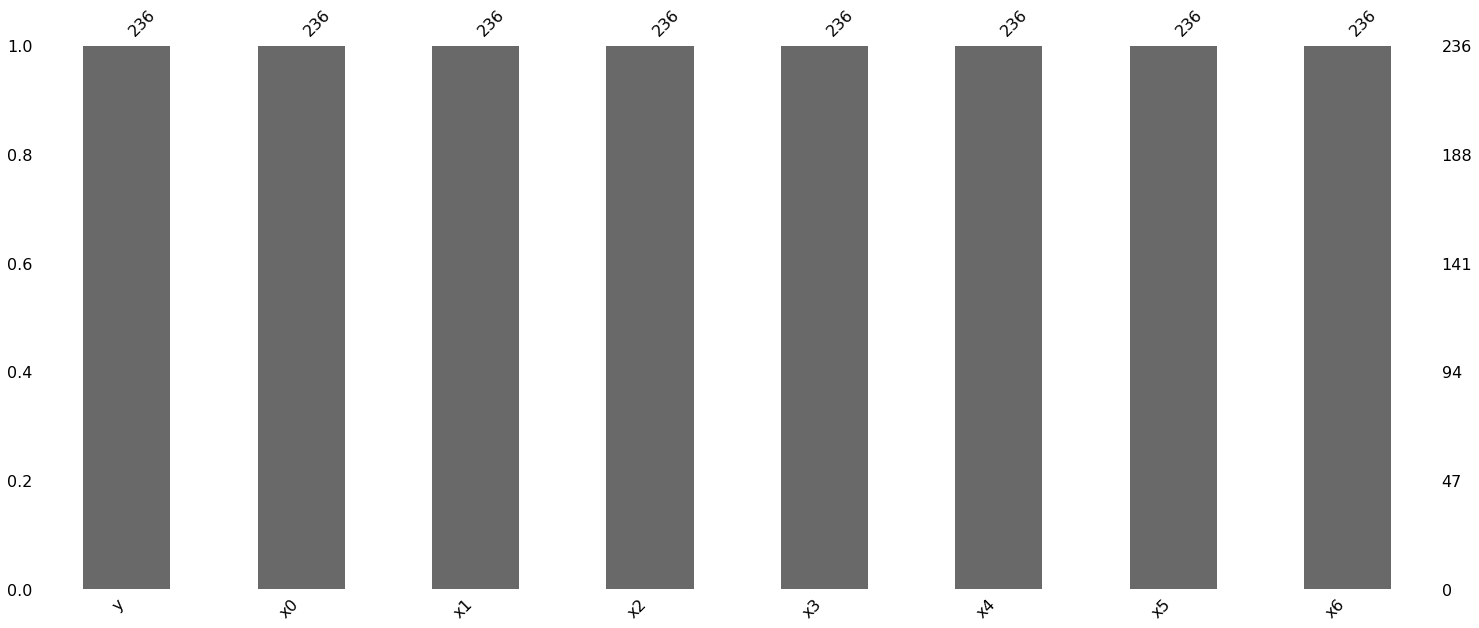

In [ ]:
msn.bar(df)

In [ ]:
Y=df.iloc[:,0]
X=df.iloc[:,1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=43)

,y,x0,x1,x2,x3,x4,x5,x6
y,1.000000,0.999999,0.999994,0.999997,0.999998,0.999994,0.999995,0.999998
x0,0.999999,1.000000,0.999995,0.999997,0.999999,0.999995,0.999996,0.999999
x1,0.999994,0.999995,1.000000,0.999993,0.999992,0.999989,0.999990,0.999995
x2,0.999997,0.999997,0.999993,1.000000,0.999996,0.999992,0.999994,0.999995
x3,0.999998,0.999999,0.999992,0.999996,1.000000,0.999994,0.999996,0.999997
x4,0.999994,0.999995,0.999989,0.999992,0.999994,1.000000,0.999991,0.999994
x5,0.999995,0.999996,0.999990,0.999994,0.999996,0.999991,1.000000,0.999993
x6,0.999998,0.999999,0.999995,0.999995,0.999997,0.999994,0.999993,1.000000


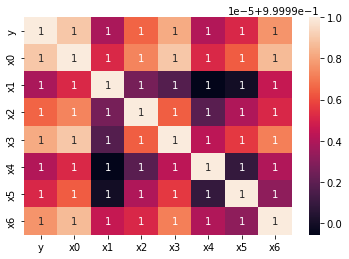

In [ ]:
import seaborn as sb
corr= df.corr()
sb.heatmap(corr,annot=True)
corr

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
# Appening a column of 1 to consider beta[0][0]
X_train_inserting = np.insert(X_train_scaled,0,1,axis=1)
X_test_inserting = np.insert(X_test_scaled,0,1,axis=1)

In [ ]:
Y_train = Y_train.reset_index(drop=True)

In [ ]:
Y_train

0      325000.0
1      426000.0
2      498000.0
3      146000.0
4       70100.0
         ...   
172     22800.0
173    170000.0
174    402000.0
175     56400.0
176    103000.0
Name: y, Length: 177, dtype: float64

##Gradient descent

In [ ]:
from sklearn.metrics import r2_score
lr = [0.0001,0.001,0.01,0.1,1,10]
lamdas = [10-15,10-10,10-5,10- 3,0,1,10,20]
Score = []
n=236

In [ ]:
for lamda in lamdas:
  for learning_rate in lr:
    beta=np.zeros(8)
    number_of_iterations=100
    for i in range(number_of_iterations):
        x0_gradient=0
        x1_gradient=0
        x2_gradient=0
        x3_gradient=0
        x4_gradient=0
        x5_gradient=0 
        x6_gradient=0
        x7_gradient=0    
        for j in range(len(X_train)):
          a=X_train_inserting[j,0]
          b=X_train_inserting[j,1]
          c=X_train_inserting[j,2]
          d=X_train_inserting[j,3]
          e=X_train_inserting[j,4]
          f=X_train_inserting[j,5]
          g=X_train_inserting[j,6]
          h=Y_train[j]
          x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)
          x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*a)
          x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*b)
          x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*c)
          x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*d)
          x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*e)
          x6_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*f)
          x7_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)+(beta[6]*f)+(beta[7]*g)-h)*g)
        beta[0]=beta[0]-learning_rate/n*(x0_gradient+lamda*beta[0])
        beta[1]=beta[1]-learning_rate/n*(x1_gradient+lamda*beta[1])
        beta[2]=beta[2]-learning_rate/n*(x2_gradient+lamda*beta[2])
        beta[3]=beta[3]-learning_rate/n*(x3_gradient+lamda*beta[3])
        beta[4]=beta[4]-learning_rate/n*(x4_gradient+lamda*beta[4])
        beta[5]=beta[5]-learning_rate/n*(x5_gradient+lamda*beta[5])
        beta[6]=beta[6]-learning_rate/n*(x6_gradient+lamda*beta[6])
        beta[7]=beta[7]-learning_rate/n*(x7_gradient+lamda*beta[7])
        y_pred = X_test_inserting.dot(beta)
        Score.append({'lamda':lamda,'lr':learning_rate,'score':r2_score(y_pred,Y_test),'beta':beta})

In [ ]:
maxScore = 0
for i in Score:
  maxScore = max(maxScore,i['score'])
finalBeta = [final['beta'] for final in Score if final['score'] == maxScore]

In [ ]:
finalBeta = finalBeta[0]

In [ ]:
finalBeta

array([126293.39557155, 126293.39557155,  28551.77969009,  28549.94953058,
        28551.21786407,  28552.08044794,  28549.47914513,  28549.6911324 ])

#Question 2:
Load the Hitters dataset from the following link:
https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing
<br>
(a) Pre-process the data (null values, noise, categorical to numerical encoding)
<br>
(b) Separate input and output features and perform scaling<br>
(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use
regularization parameter as 0.5748) regression function on the dataset.<br>
(d) Evaluate the performance of each trained model on test set. Which model performs the best and Why?

##(a) Pre-process the data (null values, noise, categorical to numerical encoding)

In [ ]:
df = pd.read_csv('/content/Hitters.csv')

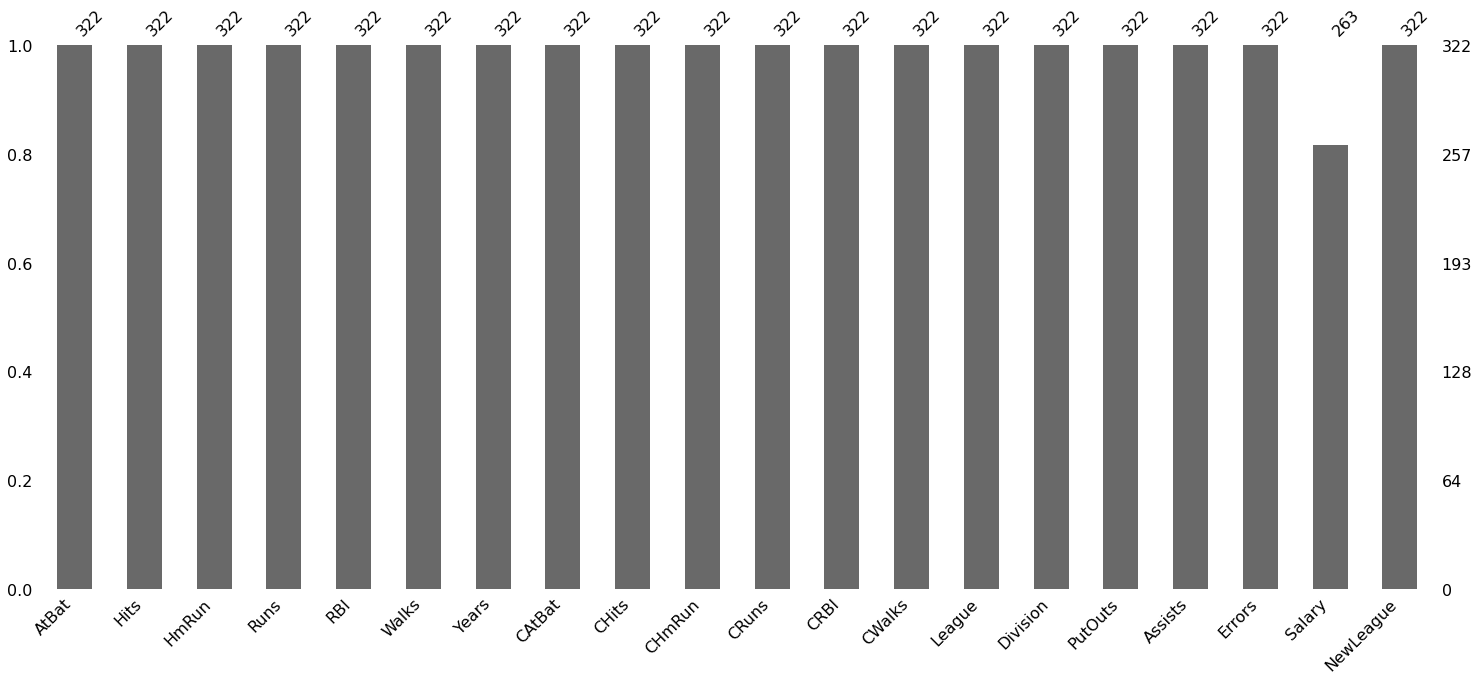

In [ ]:
msn.bar(df)

In [ ]:
for feature in df.columns:
  if  df[feature].isnull().sum()>0:
    df.fillna(df[feature].mean(),inplace=True) #mean se replace central tendency 

In [ ]:
print(df.NewLeague.unique())
print(df.League.unique())
print(df.Division.unique())

['A' 'N']
['A' 'N']
['E' 'W']


In [ ]:
for feature in df.columns:
  if df[feature].dtype == object:
    print(feature)

League
Division
NewLeague


In [ ]:
# A = 1, N = 0 
# E = 1, W = 0
df['League'].replace('A',1,inplace=True)
df['League'].replace('N',0,inplace=True)
df['NewLeague'].replace('A',1,inplace=True)
df['NewLeague'].replace('N',0,inplace=True)
df['Division'].replace('E',1,inplace=True)
df['Division'].replace('W',0,inplace=True)

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

##(b) Separate input and output features and perform scaling

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
# Appening a column of 1 to consider beta[0][0]
X_train_inserting = np.insert(X_train_scaled,0,1,axis=1)
X_test_inserting = np.insert(X_test_scaled,0,1,axis=1)

In [ ]:
X_train_scaled

array([[-0.39752209, -0.56485126, -0.67097354, ..., -0.65436448,
        -0.77786898, -1.0395114 ],
       [ 0.78043454,  0.79170311, -0.43729634, ...,  1.8317234 ,
         0.31568516,  0.81893145],
       [ 1.29174538,  1.45921399, -0.32045774, ..., -0.67682913,
         0.00324112, -0.78837047],
       ...,
       [ 0.28206827, -0.09113386,  1.43212127, ..., -0.69180556,
        -0.1529809 ,  0.0301628 ],
       [-0.47518956, -0.32799256, -0.78781214, ..., -0.72924664,
        -0.77786898,  0.0301628 ],
       [-0.9282498 , -1.08163388, -1.02148934, ...,  0.22175685,
         0.31568516, -0.37398795]])

##(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset.


In [ ]:
def r2Score(Y_pred,Y_test=Y_test):
  error = Y_pred - Y_test
  sse = np.sum(error**2)
  # getting the total variance of the model
  sst = np.sum((Y_test - np.mean(Y_test))**2)
  # r2score = 1- (SSE)/(SST)  1 - unexplained/total
  r2score = 1- ((sse)/(sst))
  return r2score*100

###Linear

In [ ]:
A = X_train_inserting.T.dot(X_train_inserting)
B = np.linalg.inv(A)
C = B.dot(X_train_inserting.T)
beta_linear = C.dot(Y_train)

In [ ]:
Y_pred_linear = X_test_inserting.dot(beta_linear)

In [ ]:
r2Score(Y_pred_linear)

72.88508942850825

###Ridge

In [ ]:
lamda = 0.5784
A = X_train_inserting.T.dot(X_train_inserting)
I = np.identity(A.shape[0])
B = np.linalg.inv(np.add(A,lamda*I))
C = B.dot(X_train_inserting.T)
beta_ridge = C.dot(Y_train)

In [ ]:
Y_pred_ridge = X_test_inserting.dot(beta_ridge)

In [ ]:
r2Score(Y_pred_ridge)

72.74283125003879

###LASSO

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[0.5748]).fit(X_train_inserting, Y_train)
lasso.score(X_test_inserting, Y_test)

-0.008305736934343333



```
# The best score came out with Linear Regression similar to that of Ridge Regression though using LASSO the score reduced exponentially owing to its property of doing feature selection.
```



#Question 3
**Cross Validation for Ridge and Lasso Regression**<br/>
Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV) function of Python. Implement both on Boston House Prediction Dataset (load_boston dataset from sklearn.datasets).

In [ ]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,test_size=0.20)

In [ ]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV([1e-3, 1e-2, 1e-1, 1],cv=5).fit(X_train, Y_train)
print(ridge.score(X_test, Y_test)*100)

76.35045352106553


In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, Y_train)
print(lasso.score(X_test, Y_test)*100)

76.35005632846243
